In [ ]:
"""Comparison between SGD and Adam"""

In [15]:
"""All necessary functions and additions"""

from optimizers import *
import numpy as np

def rastrigin(x, A=10):
    """
    Rastrigin function 2D
    It has a lot of local minimums and maximums
    """
    return A*2 + (x[0]**2 - A*np.cos(2*np.pi*x[0])) + (x[1]**2 - A*np.cos(2*np.pi*x[1]))

def rastrigin_gradient(x, A=10):
    """Gradient of Rastrigin function"""
    grad_x = 2*x[0] + 2*np.pi*A*np.sin(2*np.pi*x[0])
    grad_y = 2*x[1] + 2*np.pi*A*np.sin(2*np.pi*x[1])
    return np.array([grad_x, grad_y], dtype=np.float32)

def test_optimizer_on_rastrigin(optimizer_class, start_point, steps=1000):
    """Test optimizer in Rastrigin function"""
    x = start_point.copy().astype(np.float32)
    opt = optimizer_class([x], lr=0.01)

    trajectory = [x.copy()]

    for i in range(steps):
        opt.params[0].grad = rastrigin_gradient(x)
        opt.step()
        opt.zero_grad()

        if i % 100 == 0:
            loss = rastrigin(x)
            #print(f"Step {i}: x={x}, f(x)={loss:.4f}")

        trajectory.append(x.copy())

    return x, np.array(trajectory)


# Testing
start_points = [
    np.array([2.5, 2.5]),
    np.array([1.5, 1.5]),
    np.array([0.5, 0.5])
]

for start in start_points:
    print(f"\nStarting from {start}")
    final, traj = test_optimizer_on_rastrigin(NAG, start, steps=500)
    print(f"Final: {final}, f(x)={rastrigin(final):.6f}")
    print(f"Distance to global optimum [0,0]: {np.linalg.norm(final):.4f}")


Starting from [2.5 2.5]
Final: [-3.74828 -3.74828], f(x)=48.315338
Distance to global optimum [0,0]: 5.3009

Starting from [1.5 1.5]
Final: [-3.5035682 -3.5035682], f(x)=64.544952
Distance to global optimum [0,0]: 4.9548

Starting from [0.5 0.5]
Final: [4.834923 4.834923], f(x)=56.580452
Distance to global optimum [0,0]: 6.8376


In [16]:
"""Visualization of the optimization trajectory"""
%matplotlib inline
import matplotlib.pyplot as plt
def plot_optimization_trajectory(trajectory, optimizer_name):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = rastrigin([X[i, j], Y[i, j]])

    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar(label='f(x)')

    #trajectory
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', linewidth=2, label='Trajectory')
    plt.scatter(trajectory[0, 0], trajectory[0, 1], c='green', s=200, marker='o', label='Start')
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='red', s=200, marker='*', label='End')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{optimizer_name} on Rastrigin Function')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

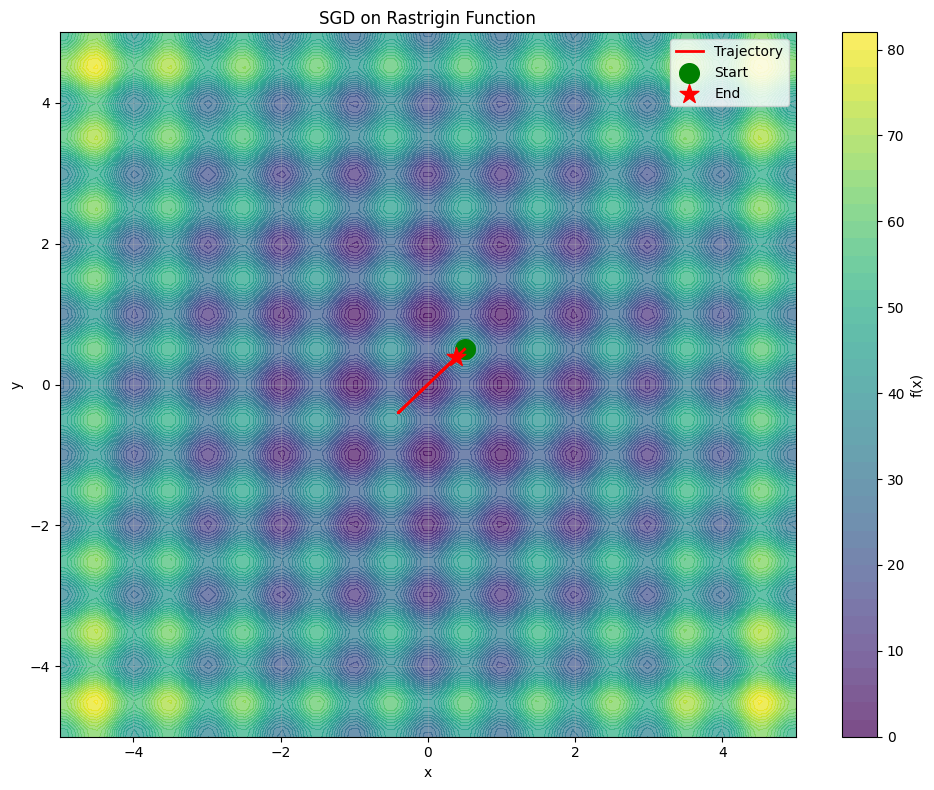

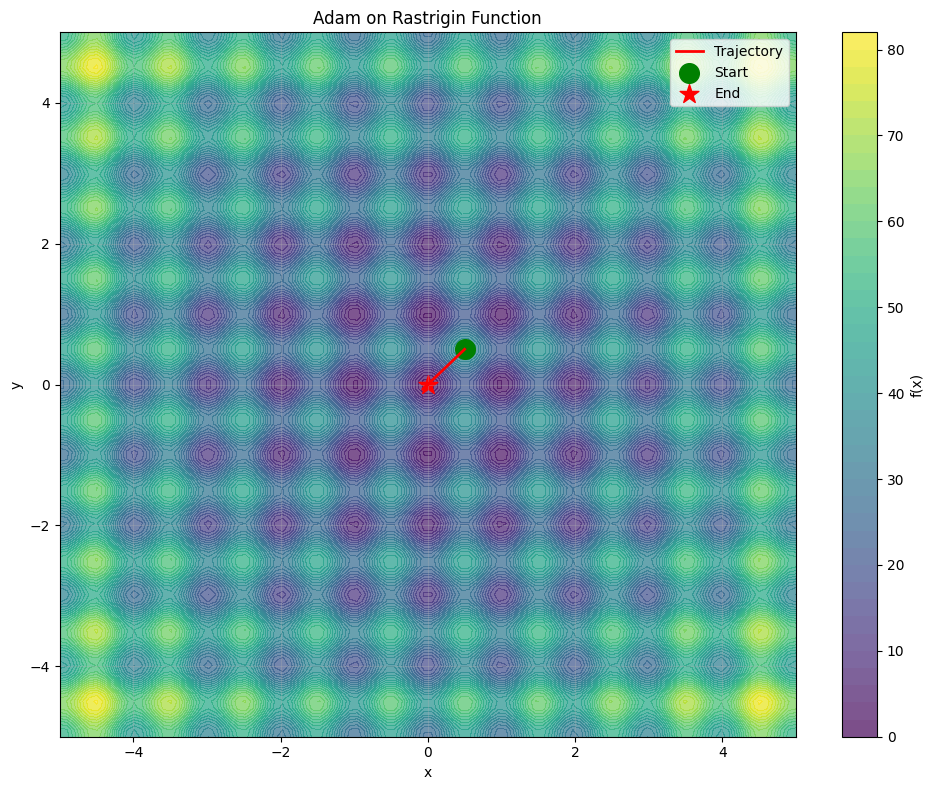

In [22]:
start = np.array([0.5, 0.5]) #start point for optimizers
final_sgd, traj_sgd = test_optimizer_on_rastrigin(SGD, start, steps=500)
final_adam, traj_adam = test_optimizer_on_rastrigin(Adam, start, steps=500)

plot_optimization_trajectory(traj_sgd, "SGD")
plot_optimization_trajectory(traj_adam, "Adam")

#SGD did not find a minimum, unlike Adam